In [92]:
from hdbscan import HDBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from load_data import load
from clean_data import clean

In [2]:
years = [x for x in range(2019, 2024)]
df = load(zhvi_years=years, zori_years=years, sale_listings_years=years, sales_years=years, days_on_market_years=years,
          new_cons_years=years)

In [3]:
zip_df = clean(df, region_type='zip')
metro_df = clean(df, region_type='metro')
county_df = clean(df, region_type='county')

In [4]:
county_df.head()

State        CountyName      ZHVI 2019      ZHVI 2020      ZHVI 2021  \
0    SC  Abbeville County  105677.886596  115845.025873  140619.655294   
1    VA   Accomack County  150579.892495  162239.538138  187085.016104   
2    ID        Ada County  337018.459037  380146.143065  517107.331426   
3    IA      Adair County  126379.939725  134099.529170  152937.435980   
4    KY      Adair County   78161.889840   84777.070068  101102.746350   

       ZHVI 2022      ZHVI 2023  ZHVF 2024-02-29  ZHVF 2024-04-30  \
0  162451.845663  169776.474991              NaN              NaN   
1  201765.598498  220096.457741              NaN              NaN   
2  572448.199052  522272.920060         0.166667         1.326667   
3  174119.483633  178424.932857         0.300000         1.700000   
4  120672.335816  123952.445044              NaN              NaN   

   ZHVF 2025-01-31  ...  3yr pct change Sales  1yr pct change Sale Listings  \
0              NaN  ...                   NaN                      0.035337   
1              NaN  ...                   NaN                     -0.111236   
2         6.013333  ...             -0.440906                     -0.144142   
3         2.100000  ...                   NaN                     -0.122256   
4              NaN  ...             -0.309034                     -0.053870   

   2yr pct change Sale Listings  3yr pct change Sale Listings  \
0                     -0.021664                     -0.314002   
1                     -0.215472                     -0.419259   
2                      0.070952                     -0.254190   
3                     -0.137794                     -0.292052   
4                      0.010147                     -0.108652   

   1yr pct change Days on Market  2yr pct change Days on Market  \
0                       0.557483                       0.253440   
1                       0.167708                      -0.021481   
2                       0.515759                       1.507109   
3                       0.233359                       0.024885   
4                       0.408762                       0.501380   

   3yr pct change Days on Market  1yr pct change New Construction  \
0                      -0.399266                         0.001354   
1                      -0.518827                        -0.005541   
2                       0.546784                        -0.100299   
3                      -0.442576                        -0.208611   
4                      -0.308473                         0.017627   

   2yr pct change New Construction  3yr pct change New Construction  
0                         0.173734                         0.730914  
1                        -0.059307                         1.007198  
2                        -0.211189                         0.130827  
3                        -0.292660                        -0.107234  
4                         0.648889                         0.455426  

[5 rows x 64 columns]

In [5]:
metro_df.head()

Metro      ZHVI 2019      ZHVI 2020  \
0                          Akron, OH  153220.647431  162116.686062   
1        Albany-Schenectady-Troy, NY  198562.402767  209114.939344   
2                    Albuquerque, NM  232045.227078  252210.767909   
3  Allentown-Bethlehem-Easton, PA-NJ  197984.948776  211334.608340   
4                    Bakersfield, CA  197040.032884  209423.737718   

       ZHVI 2021      ZHVI 2022      ZHVI 2023  ZHVF 2024-02-29  \
0  184312.604016  202026.064127  210599.278112         0.418182   
1  236677.350008  261505.064555  273536.793794         0.327778   
2  289339.415054  330667.677020  332603.579518         0.042105   
3  244413.855307  275745.683202  290579.795955         0.305263   
4  245103.109015  281410.581969  284636.817264         0.217500   

   ZHVF 2024-04-30  ZHVF 2025-01-31    ZORI 2019  ...  3yr pct change Sales  \
0         1.334091         3.675000   825.888428  ...             -0.191732   
1         1.209259         2.793519  1205.374692  ...              0.111924   
2         0.892105         4.502632   927.590250  ...             -0.406599   
3         1.401754         4.745614  1502.667335  ...             -0.220318   
4         0.977500         3.970000  1270.493917  ...             -0.293087   

   1yr pct change Sale Listings  2yr pct change Sale Listings  \
0                     -0.125733                     -0.166561   
1                     -0.210396                     -0.238854   
2                     -0.032004                     -0.136764   
3                     -0.183163                     -0.292251   
4                     -0.125573                     -0.021591   

   3yr pct change Sale Listings  1yr pct change Days on Market  \
0                     -0.406540                       0.227848   
1                     -0.115167                       0.079646   
2                     -0.332168                       0.471963   
3                     -0.429299                       0.183206   
4                     -0.141293                       0.438806   

   2yr pct change Days on Market  3yr pct change Days on Market  \
0                       0.069853                      -0.498276   
1                       0.073314                      -0.462555   
2                       0.451613                      -0.237288   
3                       0.087719                      -0.645714   
4                       0.746377                      -0.357333   

   1yr pct change New Construction  2yr pct change New Construction  \
0                        -0.575820                        -0.191406   
1                        -0.386892                        -0.578488   
2                         0.273560                         0.073951   
3                        -0.167598                        -0.096970   
4                        -0.245325                        -0.035162   

   3yr pct change New Construction  
0                         0.101064  
1                         0.102662  
2                         0.239490  
3                         0.405660  
4                         0.573394  

[5 rows x 63 columns]

In [6]:
print('Zips: ' + str(len(zip_df)))
print('Counties: ' + str(len(county_df)))
print('Metro: ' + str(len(metro_df)))

Zips: 124315
Counties: 1623
Metro: 83


In [7]:
county_df.columns

Index(['State', 'CountyName', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021',
       'ZHVI 2022', 'ZHVI 2023', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30',
       'ZHVF 2025-01-31', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021', 'ZORI 2022',
       'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019', 'Sale Listings 2020',
       'Sale Listings 2021', 'Sale Listings 2022', 'Sale Listings 2023',
       'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2023',
       'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
       'Days on Market 2022', 'Days on Market 2023', 'New Construction 2019',
       'New Construction 2020', 'New Construction 2021',
       'New Construction 2022', 'New Construction 2023', 'Transit Rank',
       'Transit Score', 'Transit TCI', 'Transit Routes',
       'Transit Shed (sq mi)', 'Transit percentage', 'Unnamed: 0', 'STATEFP',
       'COUNTYFP', 'NatWalkInd', '1yr pct change ZHVI', '2yr pct change ZHVI',
       '3yr pct change ZHVI', '1yr pct change ZORI', '2

In [8]:
column_selection = ['ZORI 2023', 'ZHVI 2023', 'ZHVF 2025-01-31', 'Transit Score', 'NatWalkInd', '3yr pct change ZHVI', '3yr pct change ZORI',
                    '3yr pct change Sale Listings', '3yr pct change Sales', '3yr pct change Days on Market',
                    '3yr pct change New Construction']

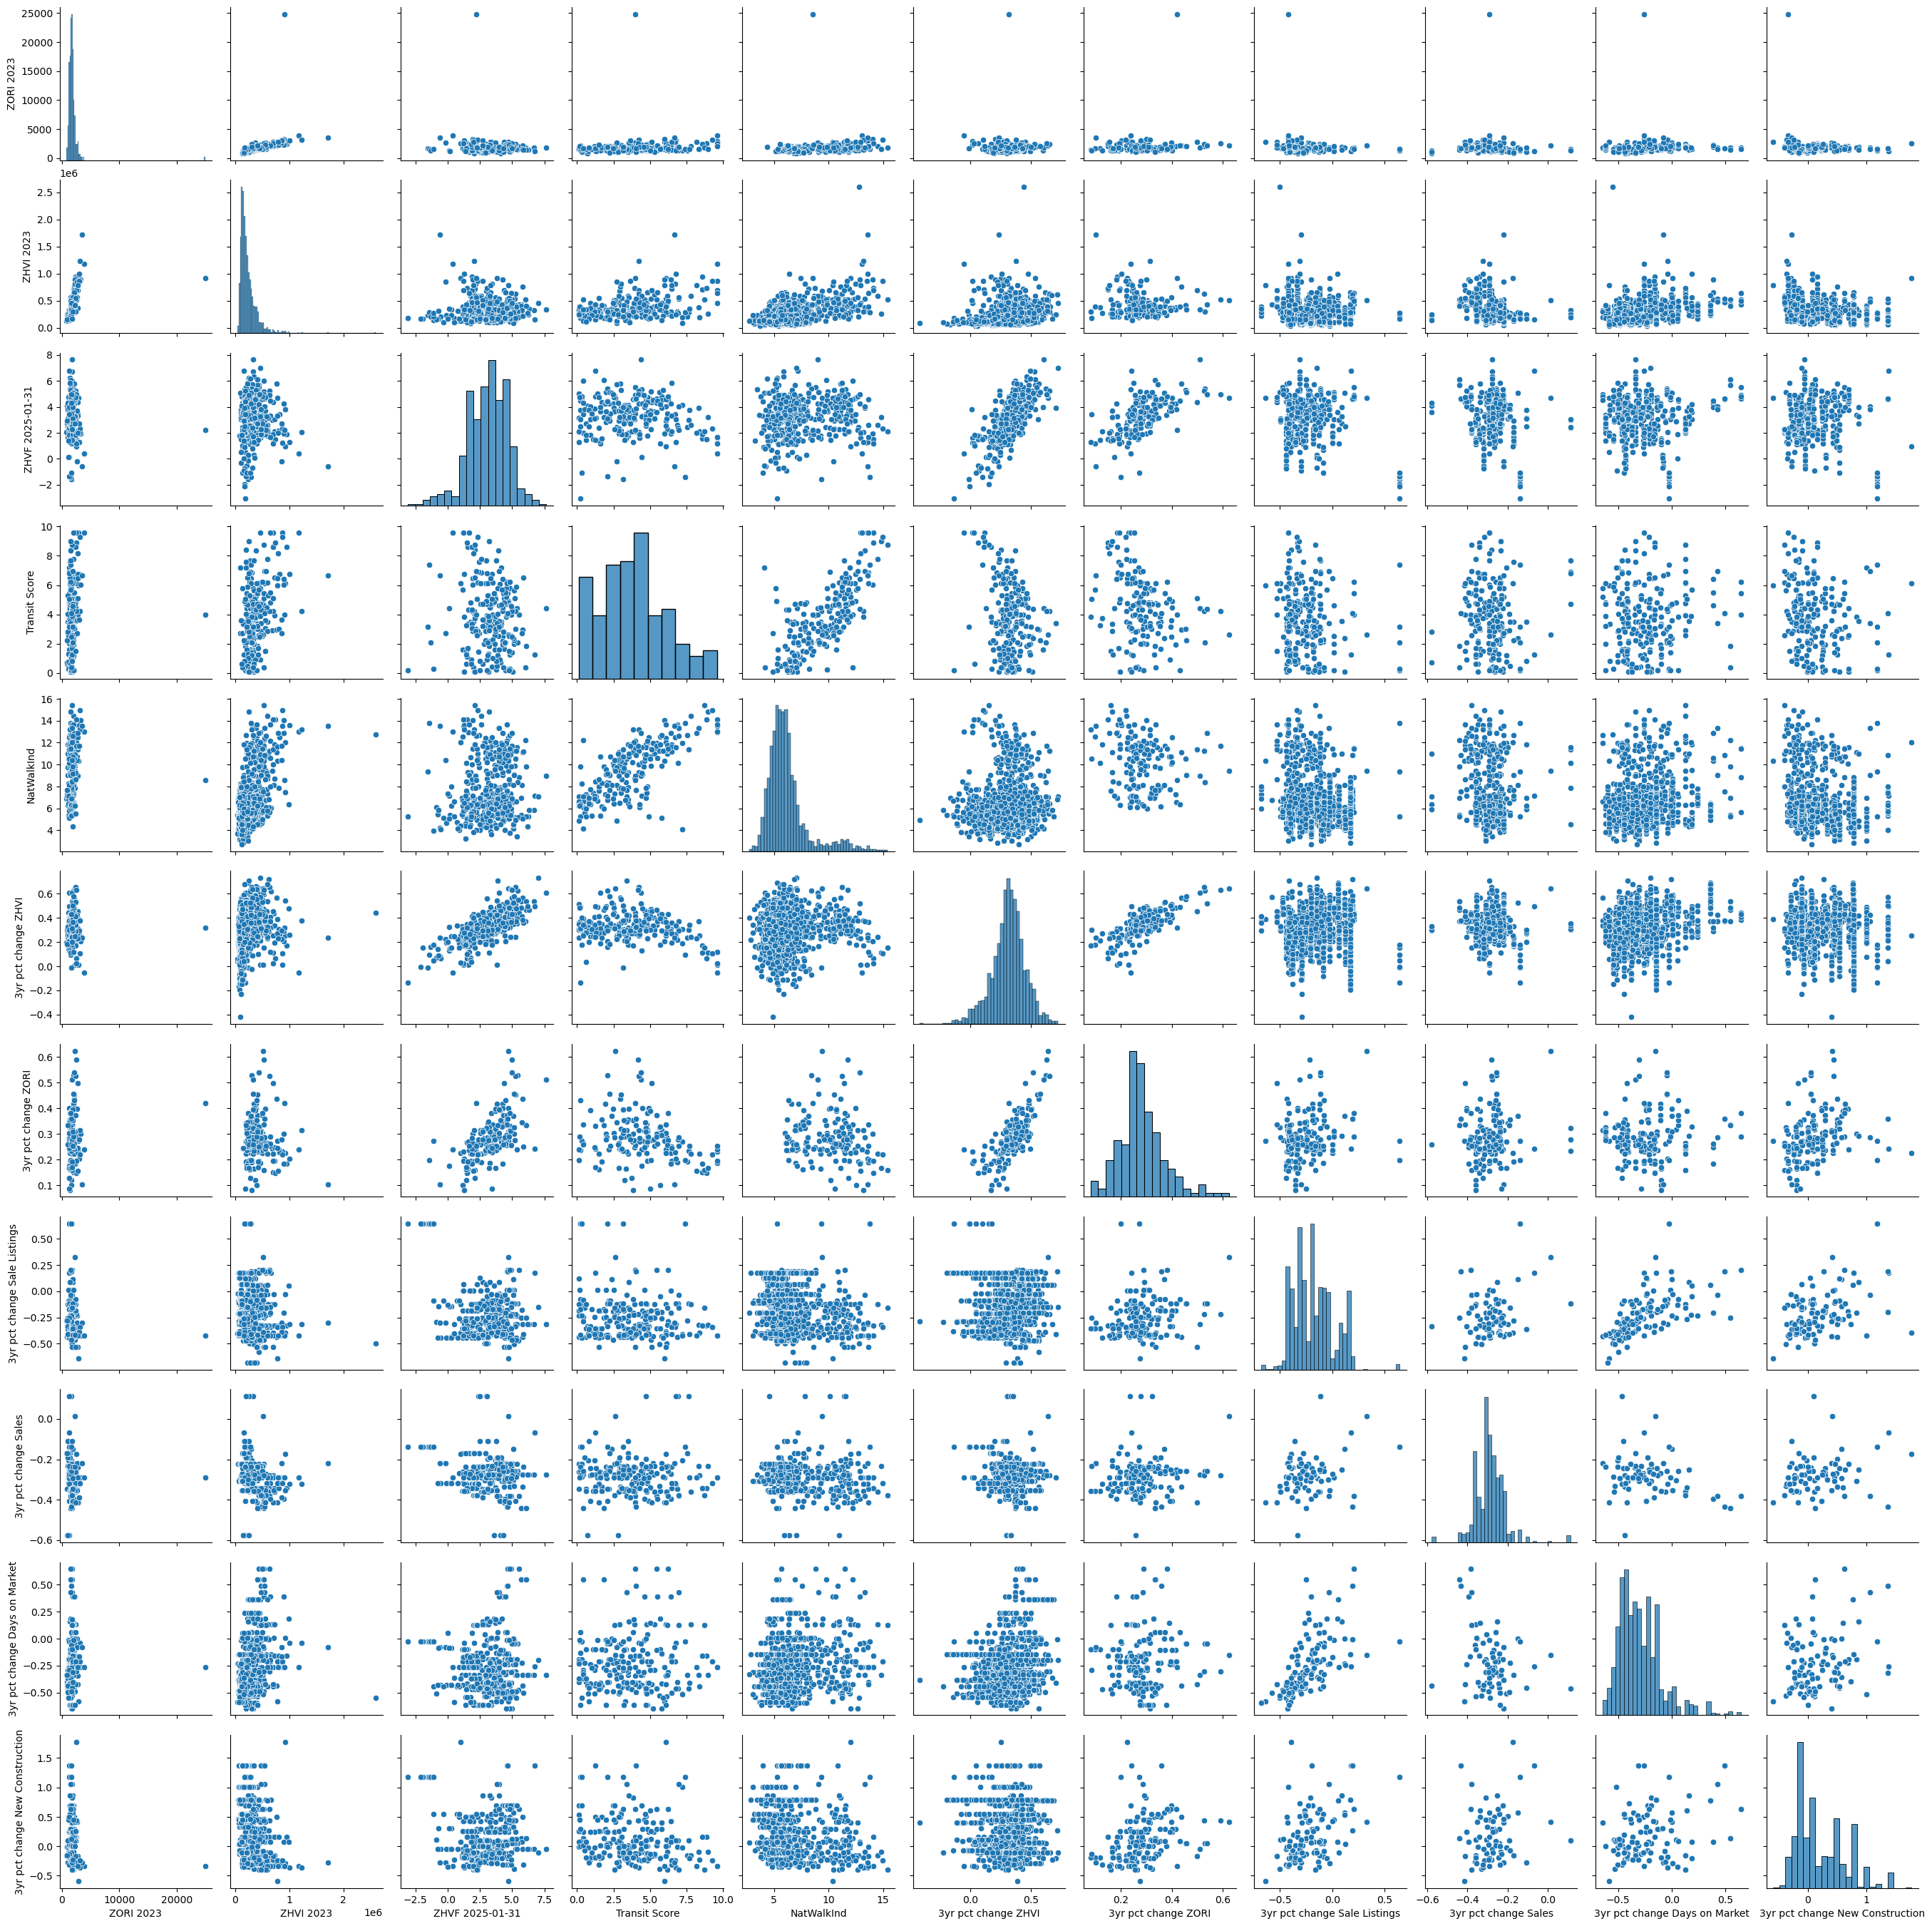

In [9]:
sns.pairplot(county_df[column_selection])

In [10]:
county_df = county_df[column_selection]
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZORI 2023                        262 non-null    float64
 1   ZHVI 2023                        1620 non-null   float64
 2   ZHVF 2025-01-31                  469 non-null    float64
 3   Transit Score                    240 non-null    float64
 4   NatWalkInd                       1578 non-null   float64
 5   3yr pct change ZHVI              1572 non-null   float64
 6   3yr pct change ZORI              178 non-null    float64
 7   3yr pct change Sale Listings     1623 non-null   float64
 8   3yr pct change Sales             542 non-null    float64
 9   3yr pct change Days on Market    1620 non-null   float64
 10  3yr pct change New Construction  1346 non-null   float64
dtypes: float64(11)
memory usage: 139.6 KB


In [11]:
county_df = county_df.dropna()
county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 2 to 1560
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZORI 2023                        139 non-null    float64
 1   ZHVI 2023                        139 non-null    float64
 2   ZHVF 2025-01-31                  139 non-null    float64
 3   Transit Score                    139 non-null    float64
 4   NatWalkInd                       139 non-null    float64
 5   3yr pct change ZHVI              139 non-null    float64
 6   3yr pct change ZORI              139 non-null    float64
 7   3yr pct change Sale Listings     139 non-null    float64
 8   3yr pct change Sales             139 non-null    float64
 9   3yr pct change Days on Market    139 non-null    float64
 10  3yr pct change New Construction  139 non-null    float64
dtypes: float64(11)
memory usage: 13.0 KB


In [13]:
scaler = StandardScaler()
scaled = scaler.fit_transform(county_df)

In [15]:
scaled

array([[-1.08726289e-01,  2.94466031e-01,  1.82455474e+00, ...,
        -1.69159587e+00,  2.83219820e+00,  9.82515488e-02],
       [-3.39811475e-03,  1.77702912e-01, -3.63660047e-01, ...,
        -7.95149146e-01,  1.20764869e+00, -6.97563854e-01],
       [-3.05878043e-01, -7.37894447e-01, -2.61892354e-01, ...,
         4.44317448e+00, -1.09291325e+00,  1.98818390e-02],
       ...,
       [-3.75495148e-01, -1.18786170e+00,  3.00467208e-02, ...,
         6.29158802e-01, -4.13415557e-01, -6.13326734e-01],
       [-2.63842882e-01,  1.85770093e-01,  9.93800916e-01, ...,
        -1.04261375e+00,  3.21279638e+00,  1.47904984e+00],
       [ 3.36553643e-01,  1.45634998e+00, -9.50782311e-01, ...,
        -1.86585248e-02, -3.14015557e-01, -1.20855899e+00]])

In [21]:
clusterer = KMeans(n_clusters=4)
clusterer.fit(scaled)
labels = clusterer.labels_
labels

/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 3, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 0, 1], dtype=int32)

/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/SeanDuffy/opt/anaconda3/lib/python3.8/site-packages/seabor

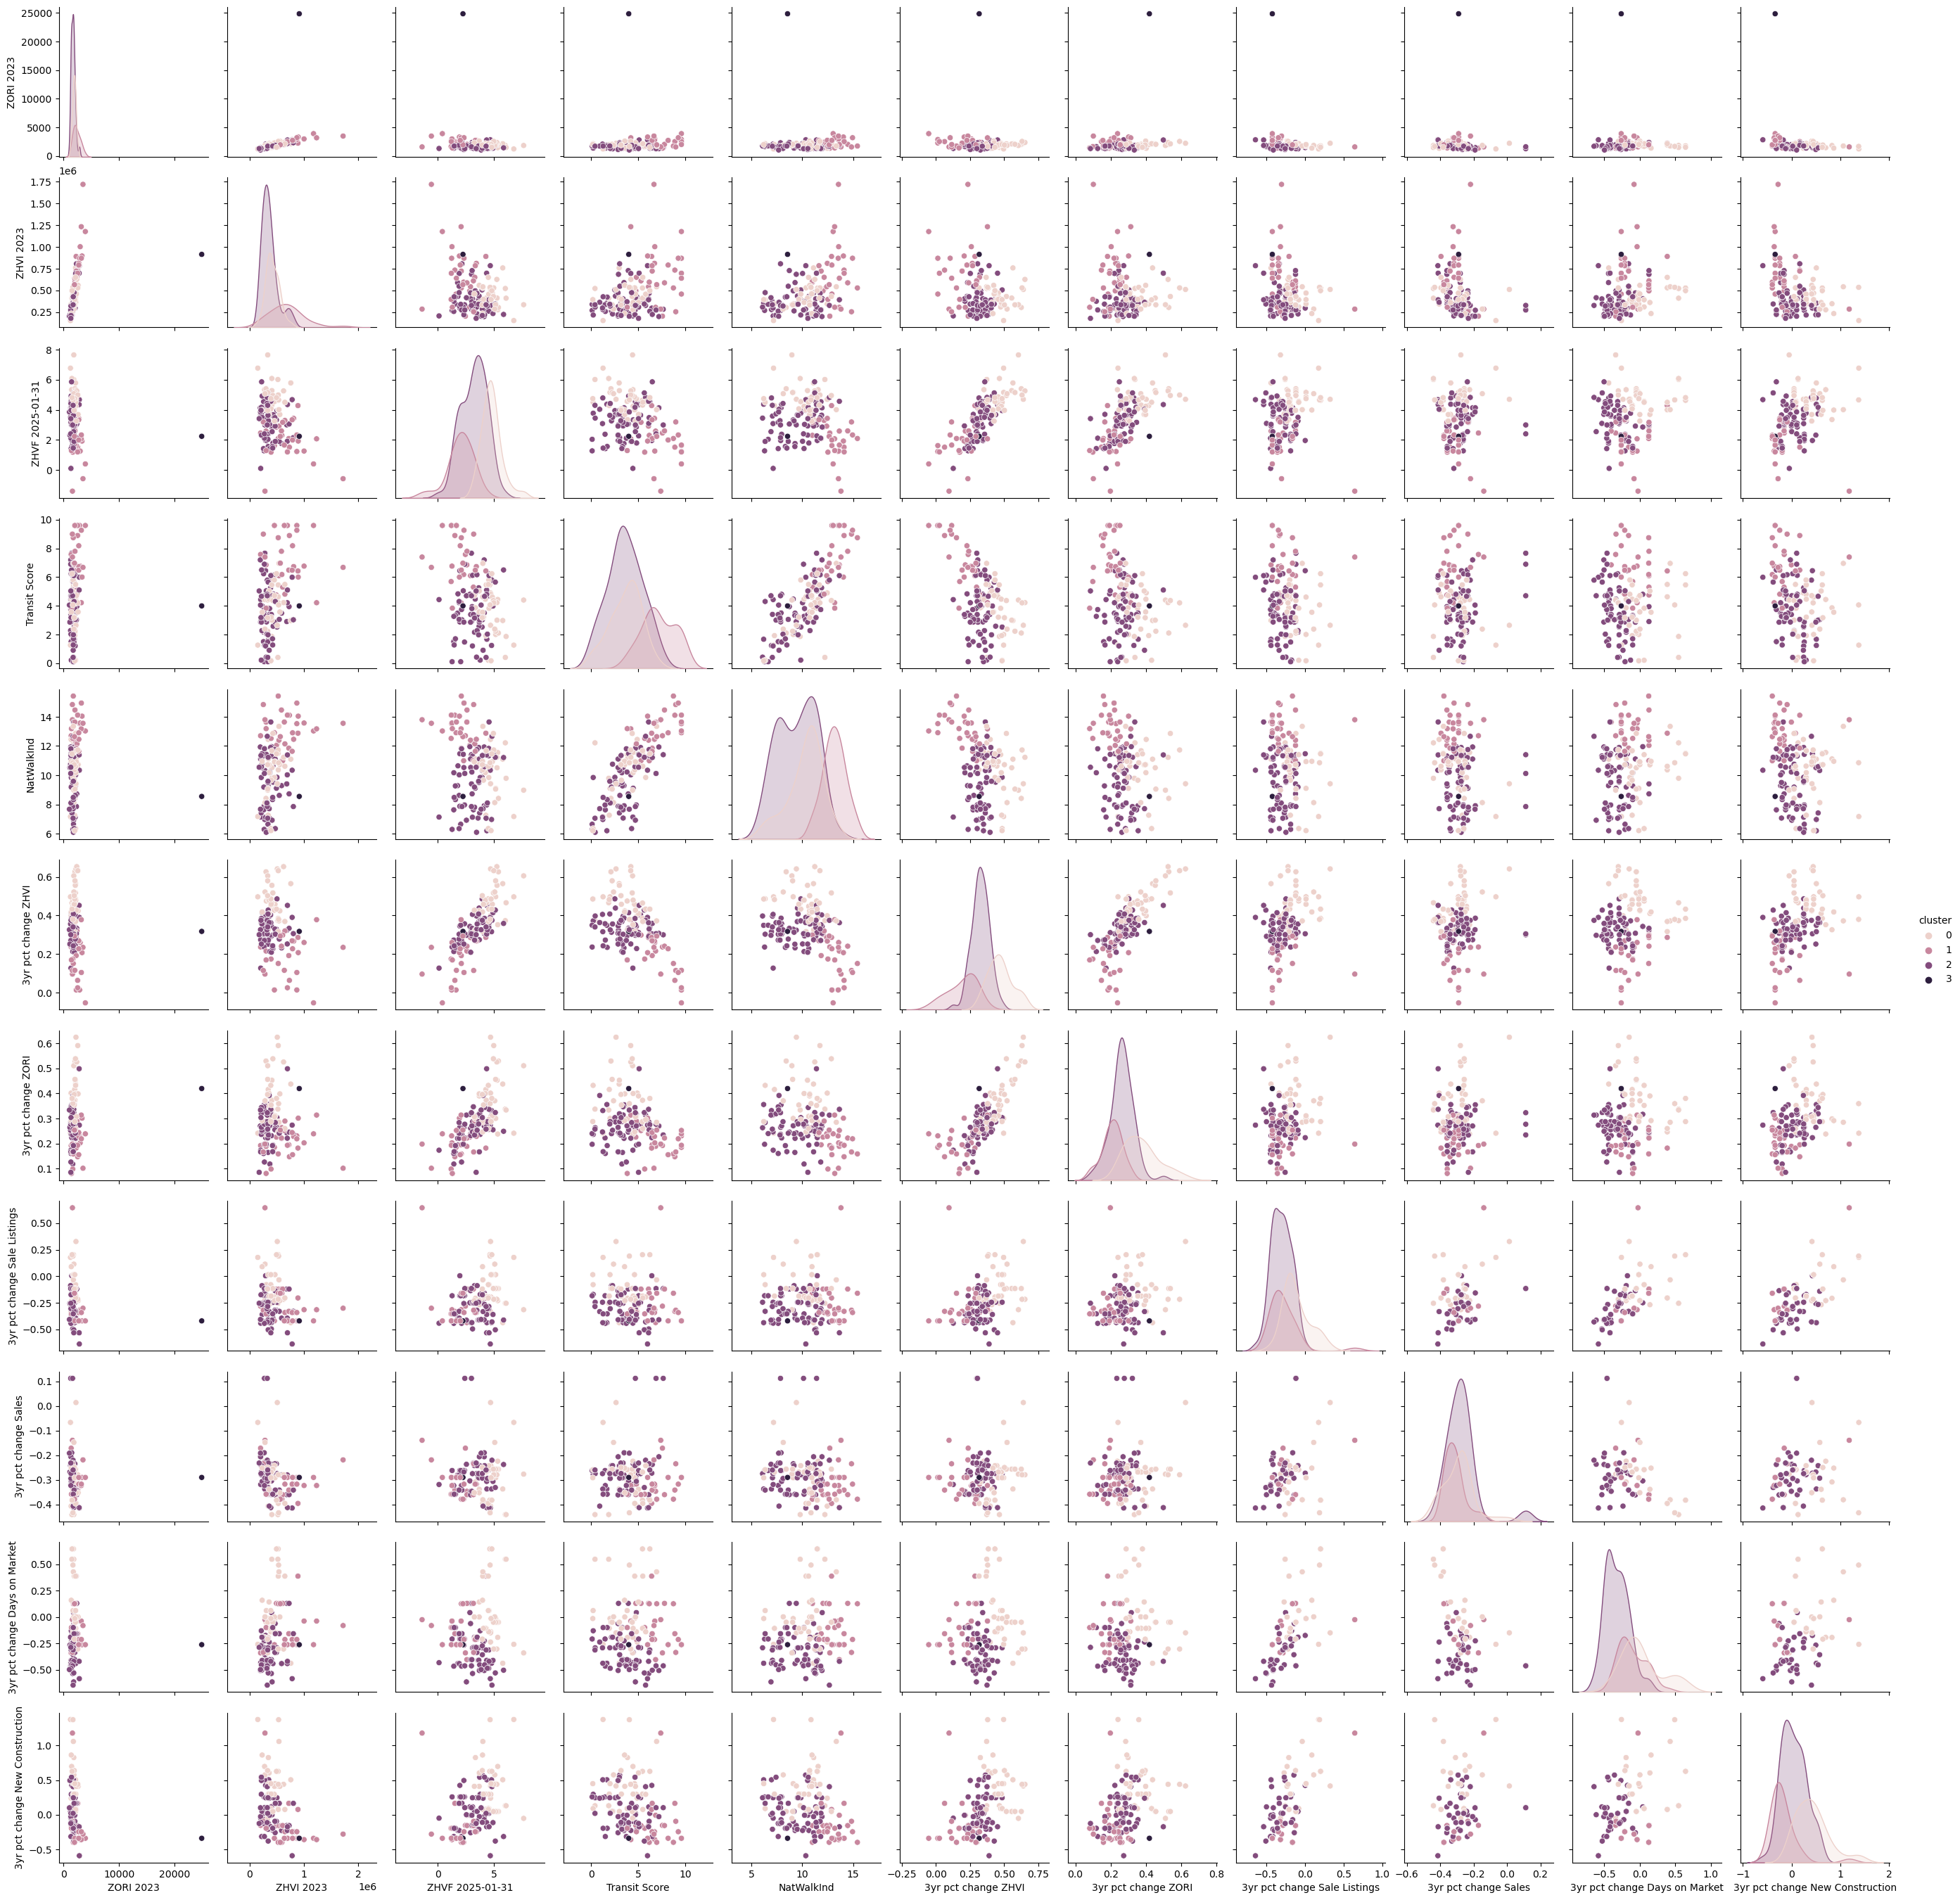

In [23]:
county_df['cluster'] = labels
sns.pairplot(county_df, hue='cluster')

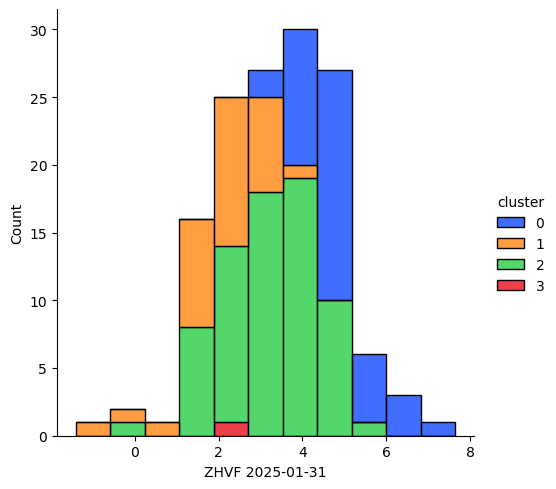

In [30]:
sns.displot(county_df, x='ZHVF 2025-01-31', hue='cluster', palette='bright', multiple='stack', )

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

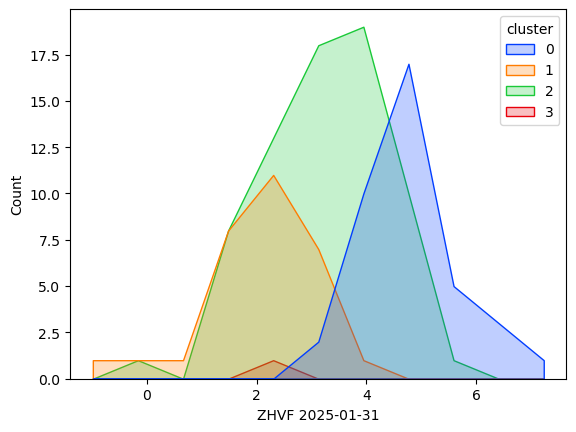

In [35]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='cluster', element='poly', palette='bright')

In [38]:
merged = pd.merge(county_df, clean(df, region_type='county'), how='left')
merged[['CountyName', 'State', 'cluster']][merged['cluster']==3]

CountyName State  cluster
126  Suffolk County    NY        3

In [28]:
county_df['cluster'].value_counts()

cluster
2    70
0    38
1    30
3     1
Name: count, dtype: int64

In [59]:
models = [None, None]
for x in range(2,11):
    clusterer = KMeans(n_clusters=x, init='random', n_init='auto', random_state=50)
    clusterer.fit(scaled)
    models.append(clusterer)

In [60]:
for x in range(2,11):
    county_df[str(x)+'cluster'] = models[x].labels_

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

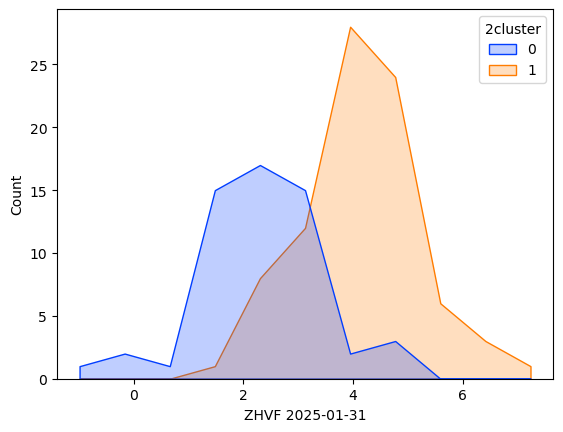

In [61]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='2cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

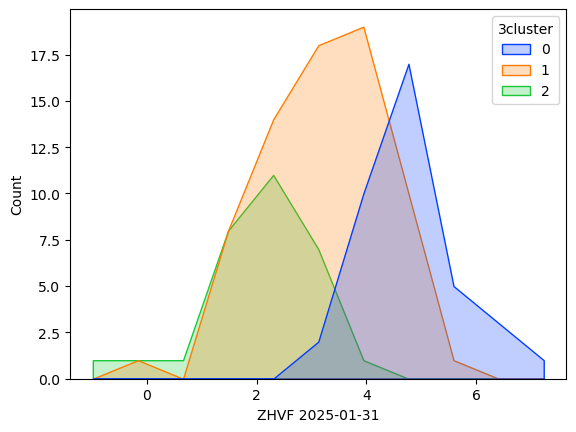

In [62]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='3cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

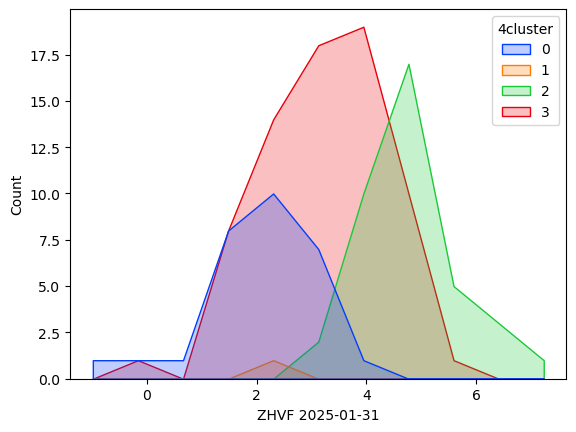

In [63]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='4cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

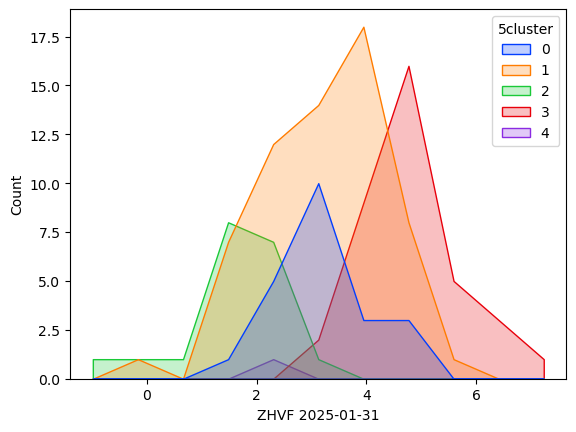

In [64]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='5cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

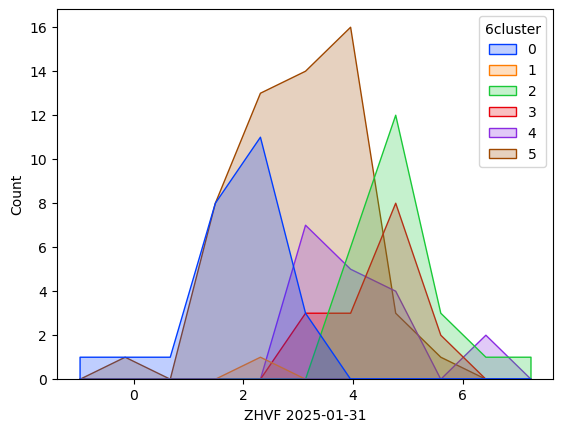

In [65]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='6cluster', element='poly', palette='bright')

In [66]:
inertias = []
sils = []
for x in range(2,11):
    inertias.append(models[x].inertia_)
    sils.append(silhouette_score(scaled, models[x].labels_))

<AxesSubplot:>

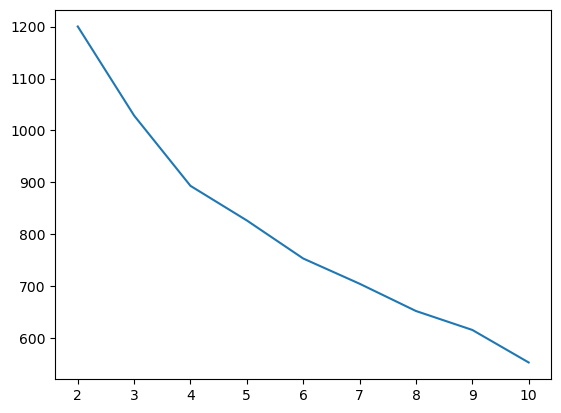

In [67]:
sns.lineplot(x=list(range(2, 11)), y=inertias)

<AxesSubplot:>

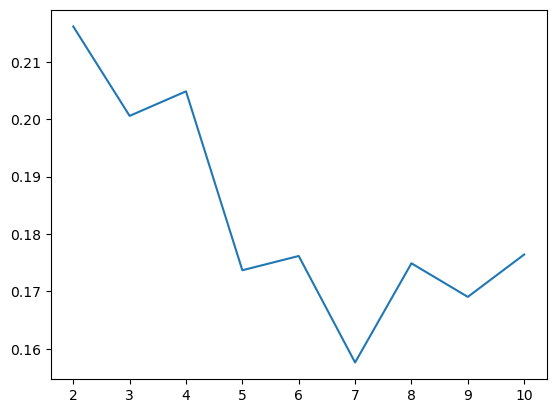

In [68]:
sns.lineplot(x=list(range(2, 11)), y=sils)

In [72]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

In [58]:
gmm_models = [None, None]
agg_models =[None, None]
for x in range(2,11):
    gmm_clusterer = GaussianMixture(n_components=x, random_state=50)
    gmm_clusterer.fit(scaled)
    gmm_models.append(gmm_clusterer)
    
    agg_clusterer = AgglomerativeClustering(n_clusters=x)
    agg_clusterer.fit(scaled)
    agg_models.append(agg_clusterer)

In [77]:
gmm_meandists = []
gmm_sils = []
agg_sils = []
for x in range(2,11):
    gmm_meandists.append(sum(np.min(cdist(scaled, gmm_models[x].means_, 'mahalanobis', VI=gmm_models[x].precisions_),
                                    axis=1) / scaled.shape[0]))
    gmm_sils.append(silhouette_score(scaled, gmm_models[x].predict(scaled)))
    
    agg_sils.append(silhouette_score(scaled, agg_models[x].labels_))

<AxesSubplot:>

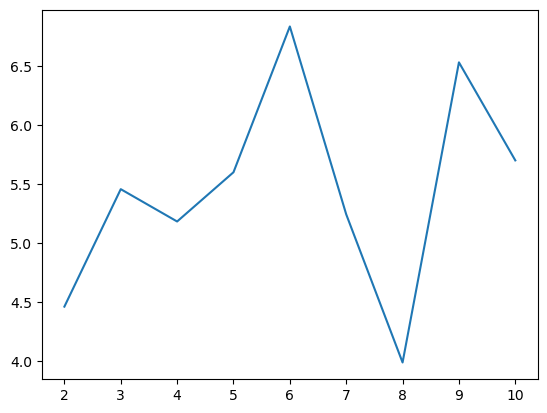

In [78]:
sns.lineplot(x=list(range(2, 11)), y=gmm_meandists)

<AxesSubplot:>

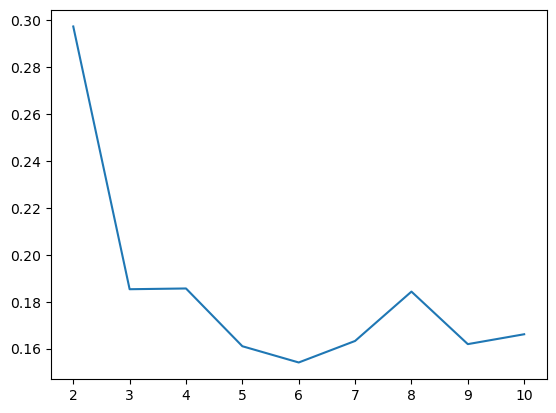

In [79]:
sns.lineplot(x=list(range(2, 11)), y=gmm_sils)

<AxesSubplot:>

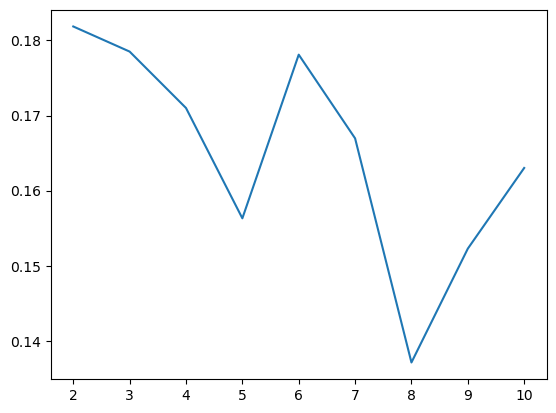

In [80]:
sns.lineplot(x=list(range(2, 11)), y=agg_sils)

In [81]:
for x in range(2,11):
    county_df[str(x)+'cluster'] = agg_models[x].labels_

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

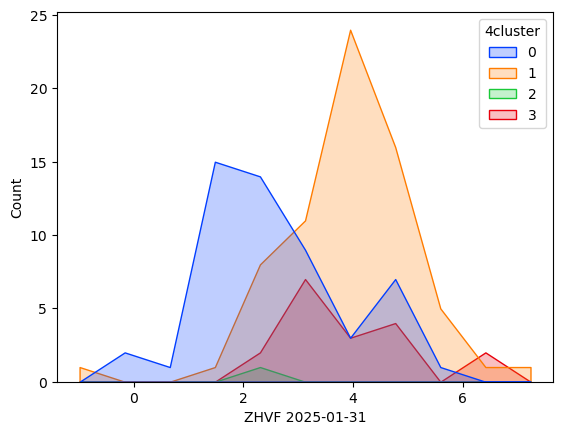

In [82]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='4cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

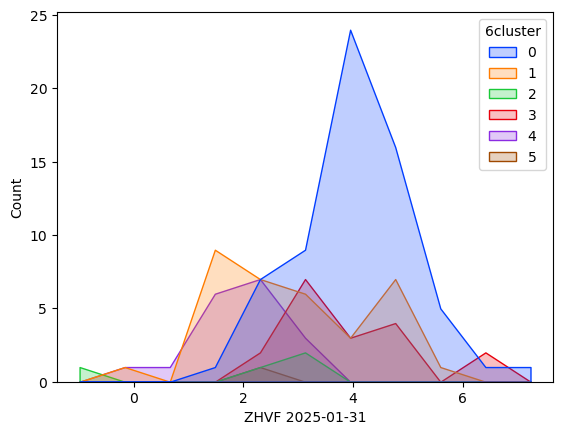

In [83]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='6cluster', element='poly', palette='bright')

In [87]:
merged = pd.merge(county_df, clean(df, region_type='county'), how='left')
merged[['CountyName', 'State', '4cluster']][merged['4cluster']==2]

CountyName State  4cluster
126  Suffolk County    NY         2

In [86]:
merged[(merged['CountyName']=='Suffolk County') & (merged['State']== ' NY')]

Empty DataFrame
Columns: [ZORI 2023, ZHVI 2023, ZHVF 2025-01-31, Transit Score, NatWalkInd, 3yr pct change ZHVI, 3yr pct change ZORI, 3yr pct change Sale Listings, 3yr pct change Sales, 3yr pct change Days on Market, 3yr pct change New Construction, cluster, 2cluster, 3cluster, 4cluster, 5cluster, 6cluster, 7cluster, 8cluster, 9cluster, 10cluster, State, CountyName, ZHVI 2019, ZHVI 2020, ZHVI 2021, ZHVI 2022, ZHVF 2024-02-29, ZHVF 2024-04-30, ZORI 2019, ZORI 2020, ZORI 2021, ZORI 2022, SizeRankMSA, Sale Listings 2019, Sale Listings 2020, Sale Listings 2021, Sale Listings 2022, Sale Listings 2023, Sales 2019, Sales 2020, Sales 2021, Sales 2022, Sales 2023, Days on Market 2019, Days on Market 2020, Days on Market 2021, Days on Market 2022, Days on Market 2023, New Construction 2019, New Construction 2020, New Construction 2021, New Construction 2022, New Construction 2023, Transit Rank, Transit TCI, Transit Routes, Transit Shed (sq mi), Transit percentage, Unnamed: 0, STATEFP, COUNTYFP, 1yr pct change ZHVI, 2yr pct change ZHVI, 1yr pct change ZORI, 2yr pct change ZORI, 1yr pct change Sales, 2yr pct change Sales, 1yr pct change Sale Listings, 2yr pct change Sale Listings, 1yr pct change Days on Market, 2yr pct change Days on Market, 1yr pct change New Construction, 2yr pct change New Construction]
Index: []

[0 rows x 74 columns]

In [88]:
for x in range(2,11):
    county_df[str(x)+'cluster'] = gmm_models[x].predict(scaled)

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

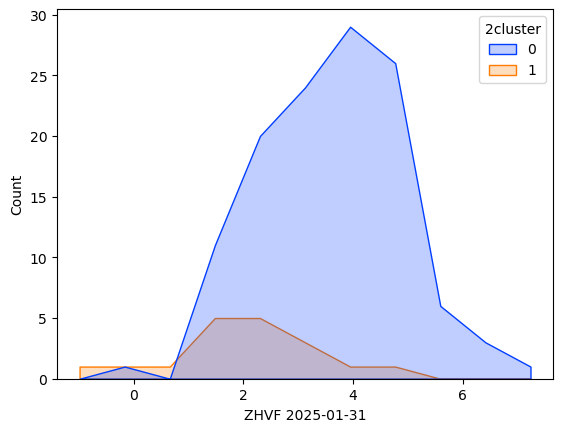

In [89]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='2cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

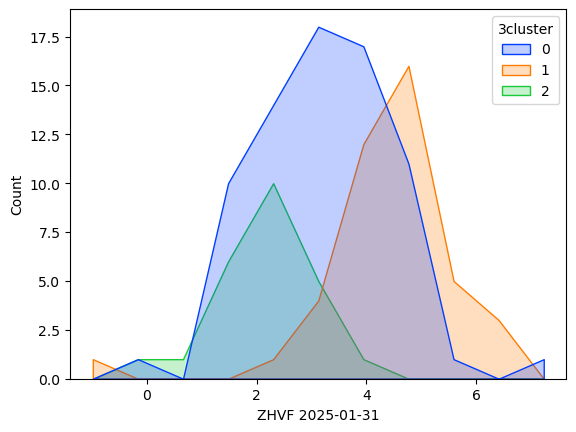

In [90]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='3cluster', element='poly', palette='bright')

<AxesSubplot:xlabel='ZHVF 2025-01-31', ylabel='Count'>

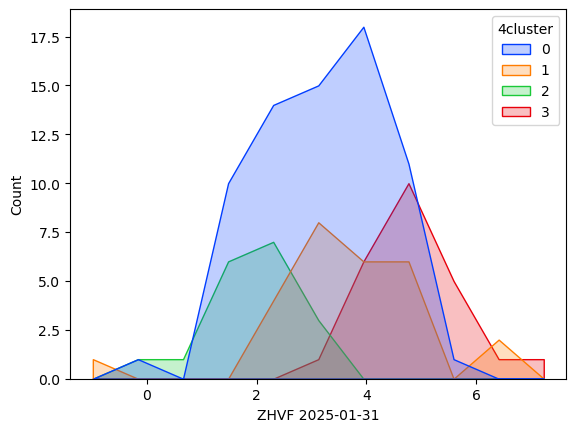

In [91]:
sns.histplot(data=county_df, x='ZHVF 2025-01-31', hue='4cluster', element='poly', palette='bright')

# COSINE DISTANCES